# Clustering

Clustering is similar to classification, but the basis is different. <br>In Clustering you don’t know what you are looking for, and you are trying to identify some segments or clusters in your data. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## K-Means

**STEP 1:** Choose the number K of clusters<br>
**STEP 2:** Select at random K points as centroids at any random X and Y values<br>
**STEP 3:** Assign each data point to the closet centroid $\rightarrow$ That forms K clusters<br>
**STEP 4:** Compute and place the new centroid of each cluster (通过计算新 cluster 的平均值，确定 new centroid)<br>
**STEP 5:** Reassign each data point to the new closest centroid. If any reassignment took place. go to STEP 4, otherwise go to FIN

<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%204%20-%20Clustering/k-means_1.JPG?raw=true' width='300'>

<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%204%20-%20Clustering/k-means_2.JPG?raw=true' width='500'>

<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%204%20-%20Clustering/k-means_3.JPG?raw=true' width='500'>

<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%204%20-%20Clustering/k-means_4.JPG?raw=true' width='500'>

<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%204%20-%20Clustering/k-means_5a.JPG?raw=true' width='500'>

<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%204%20-%20Clustering/k-means_6.JPG?raw=true' width='500'>

<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%204%20-%20Clustering/k-means_7.JPG?raw=true' width='500'>

<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%204%20-%20Clustering/k-means_8.JPG?raw=true' width='500'>

<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%204%20-%20Clustering/k-means_9.JPG?raw=true' width='500'>

<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%204%20-%20Clustering/k-means_10.JPG?raw=true' width='300'>

### Random Initialization Trap

Random initialization can affect the final clustering result<br>
**Solution:** K-Means++ <br>
K-Means++ Algorithm 防止中心点在随机初始时选择错误。

### Choosing the Right Number of Clusters

Within Cluster Sum of Square:<br>
WCSS = $\sum_{P_i in Cluster 1} distance(P_i,C_1)^2 + \sum_{P_i in Cluster 2} distance(P_i,C_2)^2 + ...$<br>
意思是在Cluster j中的所有点到中心点$C_j$的距离平方总和，最后全部一起相加。当 cluster 数最多达到 data points 数时，WCSS = 0，(每个 cluster 就是 data point 本身)<br>
通过 plot WCSS 后，选择变化率极速减缓的那个点(The Elbow Method)，这个点就是 Optimal number of clusters
<img src='https://github.com/yunjcai/IBM-Machine-Learning-with-Python/blob/master/choosing_k.JPG?raw=true' width='400'>

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X = dataset.iloc[:,[3,4]].values

### Setting up K-Means

The KMeans class has many parameters that can be used, but we will be using the following:
<ul>
    <li> <b>init</b>: Initialization method of the centroids. </li>
    <ul>
        <li> k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence and avoid random initialization trap.</li>
    </ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <li> <b>max_iter</b>: The maximum number of iterations there can be defined to find the final clusters. default = 300.
    <li> <b>n_init</b>: Number of time the k-means algorithm will be run with different initial centroid. default = 10. The final results will be the best output of n_init consecutive runs in terms of inertia. </li>

### Implement Elbow Method

using the elbow method to find the optimal number of clusters<br>
<b>wcss的值可以从KMeans().fit().inertia_中得到。</b>

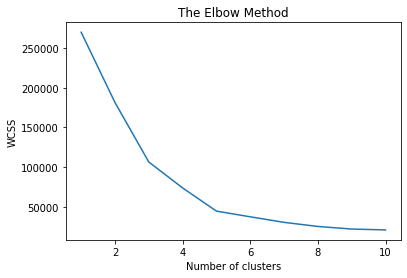

In [4]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init ='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [5]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)

Rather than using 'fit' method, we will use 'fit_predict' which returns for each observation which cluster it belongs to.

In [7]:
y_kmeans = kmeans.fit_predict(X)

### Visualising the Clusters

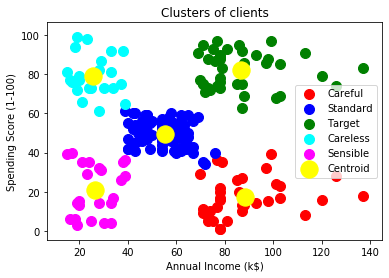

In [15]:
# Cluster 1
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Careful')
# Cluster 2
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Standard')
# Cluster 3
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Target')
# Cluster 4
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='cyan',label='Careless')
# Cluster 5
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='magenta',label='Sensible')

# Centroid
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroid')

plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Agglomerative Hierarchical Clustering

**STEP 1:** Make each data point a single-point cluster $\rightarrow$ That forms N clusters<br>
**STEP 2:** Take the two closest data points and make them one cluster $\rightarrow$ That forms N-1 clusters<br>
**STEP 3:** Take the two closest clusters and make them one cluster $\rightarrow$ That forms N-2 clusters<br>
**STEP 4:** Repeat STEP 3 until there is only one cluster

### How Dendrograms Works

A Hierarchical clustering is typically visualized as a dendrogram as shown in the following cell. Each merge is represented by a horizontal line. The y-coordinate of the horizontal line is the similarity (distance) of the two clusters (data points) that were merged, the lower y-horizontal line means the earlier merge (for example, (1) p2∩p3; (2) p5∩p6; (3) p1∩p2∩p3 (4) p4∩p5∩p6 (5) p1∩p2∩p3∩p4∩p5∩p6) <br><br>
By moving up from the bottom layer to the top node, a dendrogram allows us to reconstruct the history of merges that resulted in the depicted clustering. 
<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/fbc375a9203973170775aa749cc3a9caa888c969/Part%204%20-%20Clustering/dendrograms_1.JPG?raw=true' width='500'>

### Optimal # of Clusters

在图中找到 largest distance (每一段)，用 disimilarity (distance) threshold 来划分，意味着 cluster 间的距离不得超过 disimilarity threshold<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/8bdeda5a924e2367050a905b1ef1dc898240d204/Part%204%20-%20Clustering/dendrograms_2.JPG?raw=true' width='500'>

#### Using the Dendrogram to Find the Optimal Number of Clusters

ward method tries to minimize the variance with each cluster, similar to we tries to minimize WCSS in K-Means

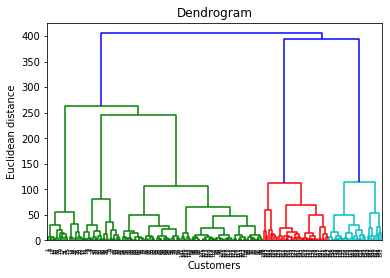

In [16]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

In [18]:
from sklearn.cluster import AgglomerativeClustering as AC
hc = AC(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(X)

### Visualising the Clusters

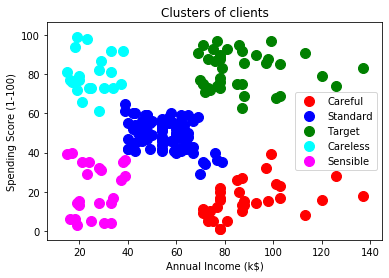

In [20]:
# Cluster 1
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='red',label='Careful')
# Cluster 2
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='blue',label='Standard')
# Cluster 3
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='green',label='Target')
# Cluster 4
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='cyan',label='Careless')
# Cluster 5
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=100,c='magenta',label='Sensible')

plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Clustering Pros & Cons

<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%204%20-%20Clustering/clustering_pros_cons.JPG?raw=true'>